### Calculate the mean

    mean = total / n




In [53]:
def getMean(nums) -> float:
    total = sum(nums)
    n = len(nums)
    mean = total / n
    return mean

### Calculate variance/sxx


In [54]:
def getVariance(nums, mean) -> float:
    var = 0
    for i in range(0, len(nums)):
        var += pow((nums[i] - mean), 2)
    return var

### Calculate covariance/sxy

In [55]:
def getCovariance(nums_1, nums_2):
    mean_1 = getMean(nums_1)
    mean_2 = getMean(nums_2)
    size = len(nums_1)
    covariance = 0.0
    for i in range(0, size):
        covariance += (nums_1[i] - mean_1) * (nums_2[i] - mean_2)
    return covariance

### Calculate SSreg

In [56]:
def ssxreg(b1, sxx):
    return (b1 ** 2) * sxx

### Calculate b1, b0, and R-Square

In [57]:
def getSlope(x_list, y_list):
    y_mean = getMean(y_list)
    x_mean = getMean(x_list)
    cov = getCovariance(x_list, y_list)
    var = getVariance(y_list, y_mean)
   
    print("\n=====\n")
    print('Cov', cov)
    print('Var', var)

    b1 = cov / var
    bo = x_mean - (b1 * y_mean)
    sreg = ssxreg(b1, var)
    stot = getVariance(x_list, x_mean)
    sreg = round(sreg)
    stot = round(stot)
    r2 = sreg / stot

    print('SS reg ', sreg)
    print('SS total ', stot)
    print('R-square ', r2)
    print('b0 ', bo)
    print('b1 ', b1)

    return b1, bo, r2

### Plot graph

In [58]:
import matplotlib.pyplot as plt

def plot_data(x, y, xfit, predX, predY, figname):
    plt.figure(dpi=120)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.scatter(x, y)
    plt.scatter(predX, predY, color='red')
    plt.plot(x, xfit, color= 'black')
    plt.savefig('./figs/'+figname, dpi=800)
    plt.show()


In [59]:
import pandas as pd


### Predict
    Pass years in a list.
    Dataset is the csv file which should have 'year' and 'population' column

In [60]:
def predict(dataset, years, libname):
    x_list = dataset['population']
    y_list = dataset['year']
    b1, b0, r2 = getSlope(x_list, y_list)
    df_ylist = pd.DataFrame(y_list)
    df_xlist = pd.DataFrame(x_list)
    predX = []
    predY = []

    predDf = pd.DataFrame()
    for year in years:
        df_ylist = df_ylist.append({'year': int(year)}, ignore_index=True)

        pred = b0 + b1 * year
        df_xlist = df_xlist.append({'population': pred}, ignore_index=True)
        predX.append(pred)
        predY.append(year)
    predDf['year'] =  pd.DataFrame(predY,columns=['year'])
    predDf['prediction'] =  pd.DataFrame(predX,columns=['prediction'])
    xfit= [b0 + (b1 * year) for year in df_ylist['year']]
    print(predDf)
    plot_data(df_ylist['year'], df_xlist['population'], xfit, predY, predX, libname+'.jpg')
    return predDf

### Read dataset

    There are two files. 
    File `IndiaPopulation.csv` has data of population growth from 1950 to 2021
    File `population.csv` is the example from the book
    

In [61]:
population_book_dataset = pd.read_csv('population.csv')

### Predict book example 
    Predict 2015 and 2020 population from the example given in the book
    


=====

Cov 337250.0
Var 4550.0
SS reg  24997266
SS total  25115321
R-square  0.995299482734065
b0  -142201.26373626373
b1  74.12087912087912
   year   prediction
0  2015  7152.307692
1  2020  7522.912088


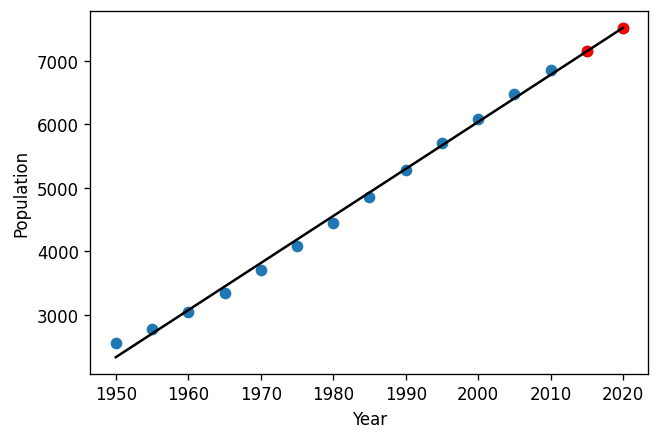

In [62]:
years = [2015, 2020]
predDf = predict(population_book_dataset, years, 'book_example_prediction')
predDf.to_csv('./files/book_example_prediction.csv', index = False)


### Checking the calculations with Book answers

<img src="example.png" alt="drawing" width="700"/>




<font size="5"> **Population in 2015, as per the book, is 7152 million people which is approximately equal to the the output from this program 7152.307692 million.**
</font> 

## **Using Scikit-Learn library to predict the population**

In [63]:
from sklearn.linear_model import LinearRegression

def predictUsingLib(dataset, libname, years):
    lr = LinearRegression()
    y_list = dataset[['population']]
    x_list = dataset[['year']]
    model = lr.fit(x_list,y_list)
    xfit = model.predict(x_list)
    pred_X = pd.DataFrame(years,columns=['year'])
    pred_X['prediction'] = model.predict(pred_X[['year']])
    plot_data(x_list, y_list, xfit, years, pred_X['prediction'], libname+'.jpg')
    bo = model.coef_
    b1 = model.intercept_

    print("Intercepts \n")
    print('b0 ', bo[0][0])
    print('b1 ', b1[0])

    print("\n")
    print("Prediction are: \n")
    print(pred_X)
    return pred_X

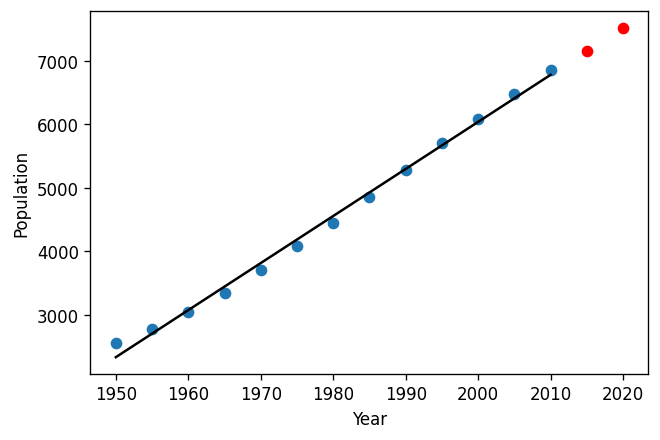

Intercepts 

b0  74.12087912087912
b1  -142201.26373626373


Prediction are: 

   year   prediction
0  2015  7152.307692
1  2020  7522.912088


In [64]:
years = [2015, 2020]

predLib = predictUsingLib(population_book_dataset, "lib_book_prediction", years)
predLib.to_csv('./files/lib_book_prediction.csv', index= False)


## Comparing Scikit learn Linear regression output with the linear regression created from scratch



Output with Scikit-learn


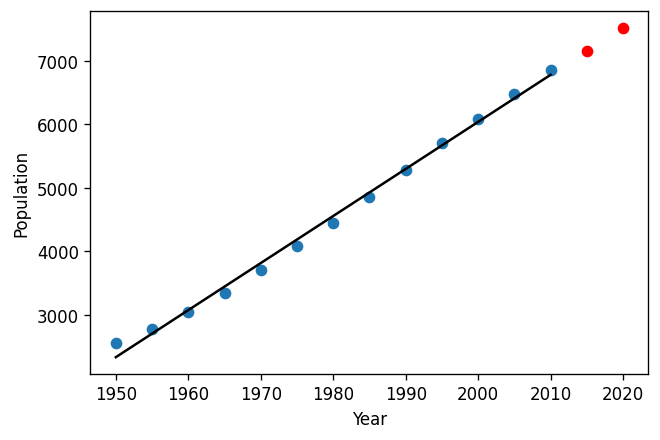

Intercepts 

b0  74.12087912087912
b1  -142201.26373626373


Prediction are: 

   year   prediction
0  2015  7152.307692
1  2020  7522.912088


Output without Scikit-learn

=====

Cov 337250.0
Var 4550.0
SS reg  24997266
SS total  25115321
R-square  0.995299482734065
b0  -142201.26373626373
b1  74.12087912087912
   year   prediction
0  2015  7152.307692
1  2020  7522.912088


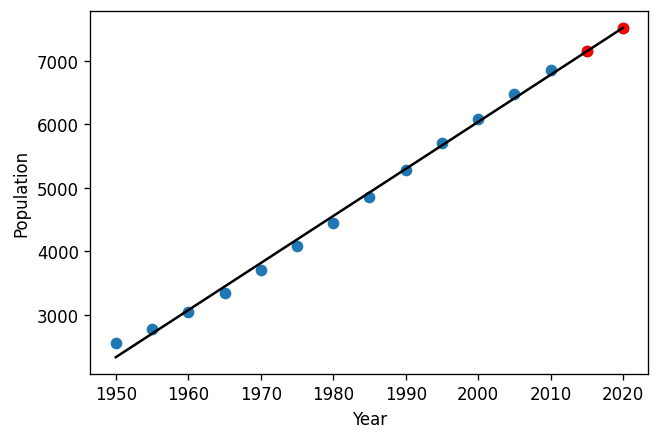

In [65]:
years = [2015, 2020]

print("\n\nOutput with Scikit-learn")
predLib = predictUsingLib(population_book_dataset, "lib_book_comparison", years)
print("\n========\n")
print("Output without Scikit-learn")
predModel = predict(population_book_dataset, years, 'book_comparison_with_lib')

newPred = pd.DataFrame(years,columns=['year'])
newPred['prediction_with_model'] = predModel['prediction']
newPred['prediction_with_scikit-learn_linear-regression'] = predLib['prediction']
newPred.to_csv('comparision.csv', index= False)



<font size="4"> Checkout the `comparision.csv`. Moreover, both the algorithm have same b0, b1, all the predictions for any given year
</font> 